In [26]:
import os
import pandas as pd
from pathlib import Path
import shutil
from scipy import stats
from pydub import AudioSegment

import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
from scipy.fft import fftshift
import numpy as np

from scipy.signal import spectrogram


In [8]:
cwd = '/Users/franky/Documents/CS573/project'
group = "cv-valid-train"
data_path = os.path.join(cwd, "data", group)
os.chdir(data_path)
print(os.getcwd())

/Users/franky/Documents/CS573/project/data/cv-valid-train


In [9]:
df = pd.read_csv( group + ".csv")
print(df)

       Unnamed: 0                          filename  age  gender     accent
0               5  cv-valid-train/sample-000005.wav  20s  female         us
1               8  cv-valid-train/sample-000008.wav  70s    male         us
2              13  cv-valid-train/sample-000013.wav  30s  female         us
3              14  cv-valid-train/sample-000014.wav  60s    male    england
4              19  cv-valid-train/sample-000019.wav  50s    male  australia
...           ...                               ...  ...     ...        ...
62416      195766  cv-valid-train/sample-195766.wav  40s    male    england
62417      195767  cv-valid-train/sample-195767.wav  30s  female         us
62418      195770  cv-valid-train/sample-195770.wav  20s    male    england
62419      195771  cv-valid-train/sample-195771.wav  30s    male    england
62420      195774  cv-valid-train/sample-195774.wav  20s    male         us

[62421 rows x 5 columns]


(82944,)
48000


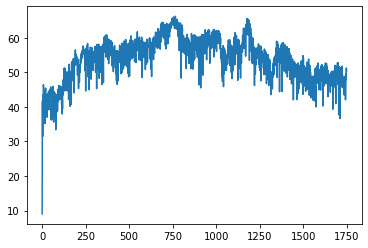

In [30]:
rate, data = wav.read('cv-valid-train/sample-000008.wav')
print(data.shape)
print(rate)
fft_out = fft(data)
plt.plot(10*np.log10(np.abs(fft_out)[0:1750]))
plt.show()

(2401,)
(115,)
(2401, 115)


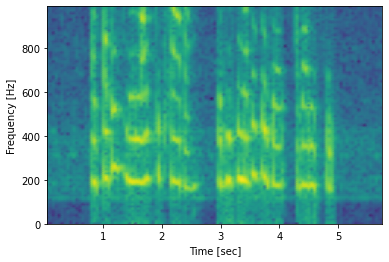

In [152]:
rate, data = wav.read('cv-valid-train/sample-000005.wav')
f, t, Sxx = spectrogram(x=data, fs=rate, nperseg=4800, window="hamming", noverlap=2400)
print(f.shape)
print(t.shape)
print(Sxx.shape)
# print(f)
plt.pcolormesh(t, f[f<1000], 10*np.log10(Sxx[f<1000]), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

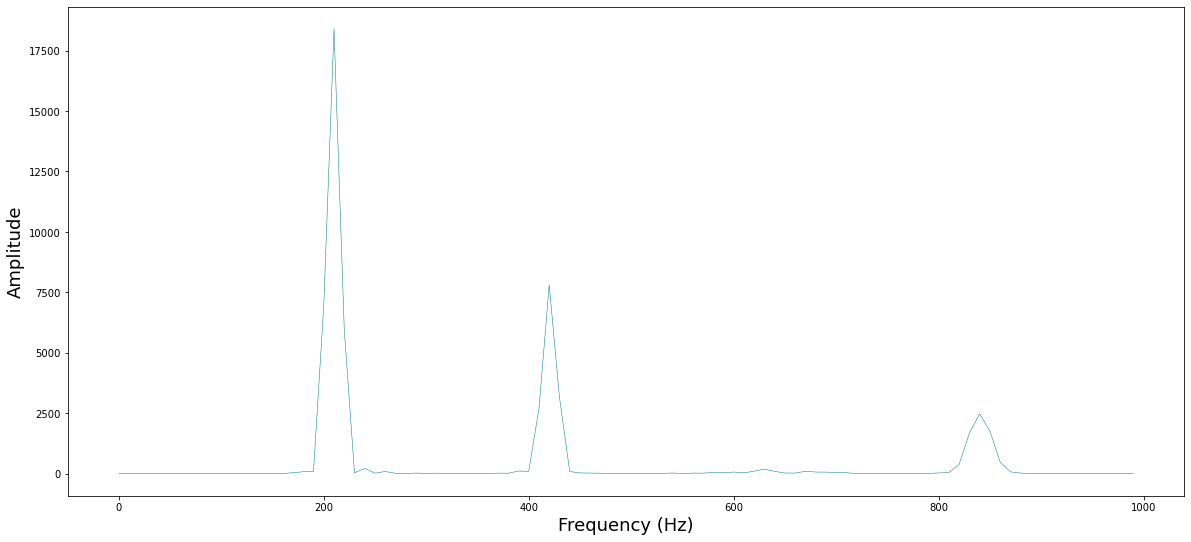

In [153]:
# plt.plot(f[f<1000], 10*np.log10(Sxx[f<1000,20]))
plt.figure(1, figsize=(20,9))
plt.subplot(111)
plt.plot(f[f<1000], Sxx[f<1000,20], linewidth=0.5, alpha=1, color='teal') #
plt.xlabel('Frequency (Hz)', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.show()

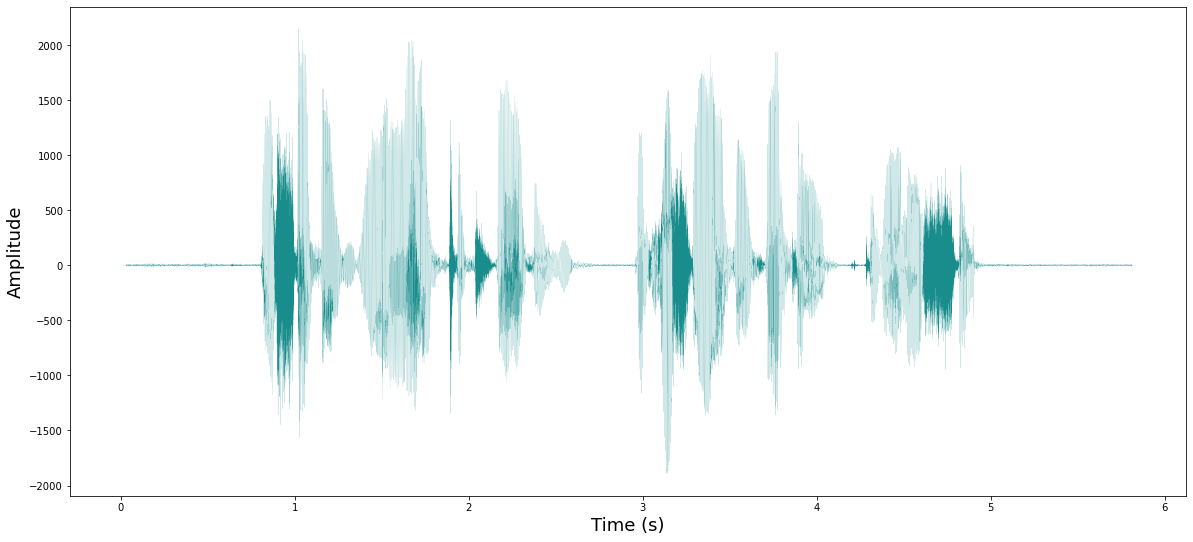

In [139]:
time = np.arange(0, float(data.shape[0]), 1) / rate
plt.figure(1, figsize=(20,9))
plt.subplot(111)
plt.plot(time, data, linewidth=0.1, alpha=0.9, color='teal') #
plt.xlabel('Time (s)', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.show()

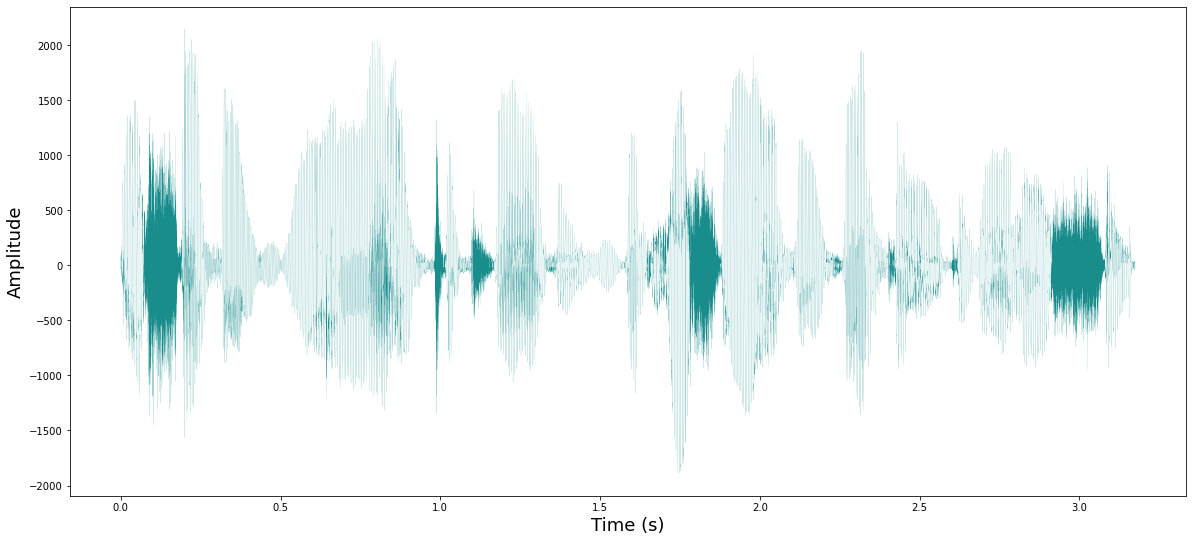

In [112]:
kernel = [0.2, 0.2, 0.2, 0.2, 0.2]
data_avg = np.convolve(data, kernel, mode='same')
data_trunc = data[np.abs(data_avg)>20]
time = np.arange(0, float(data_trunc.shape[0]), 1) / rate
plt.figure(1, figsize=(20,9))
plt.subplot(111)
plt.plot(time, data_trunc, linewidth=0.1, alpha=0.9, color='teal') #
plt.xlabel('Time (s)', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.show()

10.0


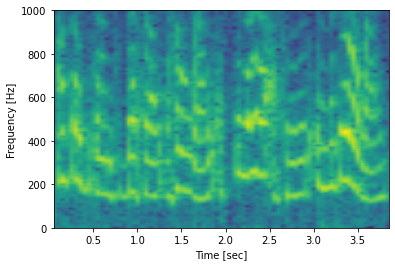

In [103]:
nperseg = 4800
f, t, Sxx = spectrogram(x=data_trunc, fs=rate, nperseg=nperseg, window="hamming", noverlap= int(nperseg/2))
print(f[1])
# plt.pcolormesh(t, f[f<1000], Sxx[f<1000], shading='gouraud')
plt.pcolormesh(t, f[f<=1000], 10*np.log10(Sxx[f<=1000]), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

(1750,)


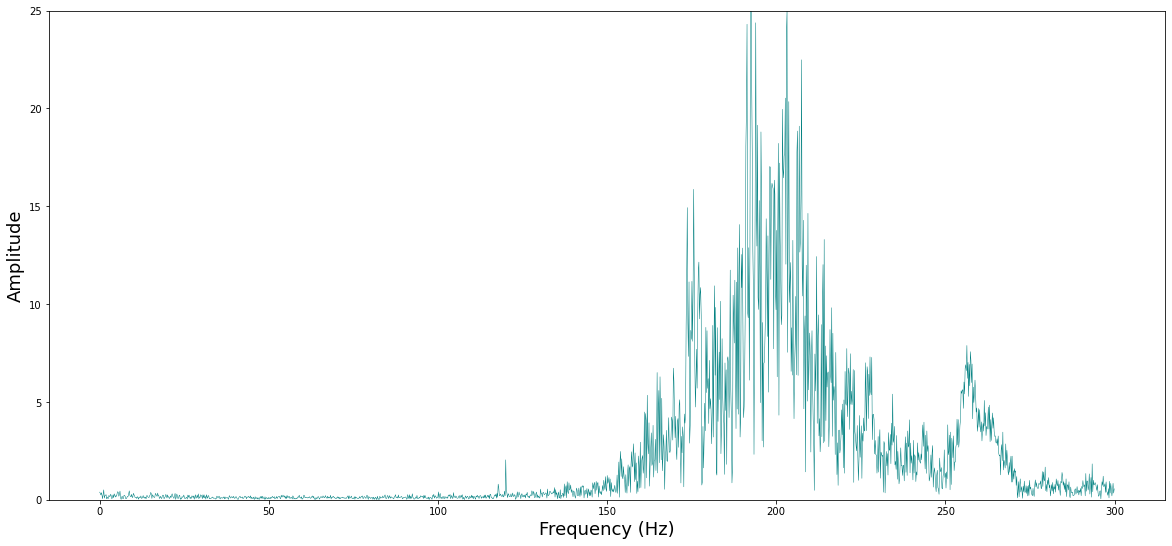

In [154]:
fourier = np.fft.fft(data)
n = len(data)
fourier = fourier[0:int(n/2)]
# scale by the number of points so that the magnitude does not depend on the length
fourier = fourier / float(n)
#calculate the frequency at each point in Hz
freqArray = np.arange(0, int(n/2), 1.0) * (rate*1.0/n);
x = freqArray[freqArray<300] #human voice range
print(x.shape)
y = np.abs(fourier[0:len(x)])
plt.figure(1,figsize=(20,9))
plt.plot(x, y, color='teal', linewidth=0.5)
plt.xlabel('Frequency (Hz)', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.ylim(0,25)
plt.show()

(1176,)


/Users/franky/miniforge3/envs/RL_pytorch/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


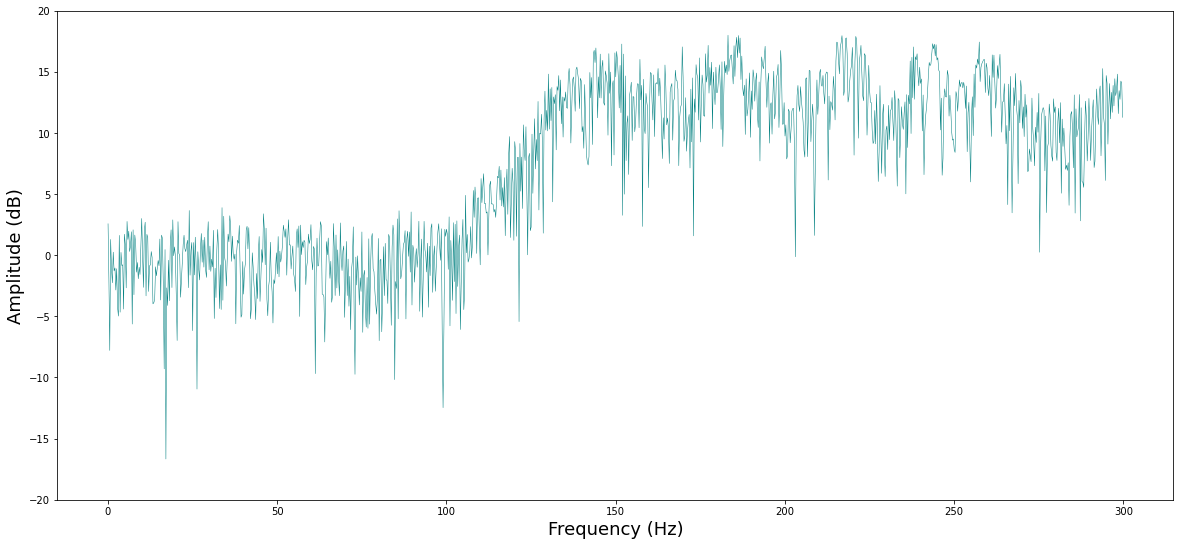

In [70]:
fourier = np.fft.fft(data_trunc)
n = len(data_trunc)
fourier = fourier[0:int(n/2)]
# scale by the number of points so that the magnitude does not depend on the length
fourier = fourier / float(n)
#calculate the frequency at each point in Hz
freqArray = np.arange(0, int(n/2), 1.0) * (rate*1.0/n);
x = freqArray[freqArray<300] #human voice range
print(x.shape)
y = 10*np.log10(fourier)[0:len(x)]
plt.figure(1,figsize=(20,9))
plt.plot(x, y, color='teal', linewidth=0.5)
plt.xlabel('Frequency (Hz)', fontsize=18)
plt.ylabel('Amplitude (dB)', fontsize=18)
plt.ylim(-20,20)
plt.show()